### Introduction

Glassdoor Reviews:
Glassdoor produces reports based upon the data collected from its users, on topics including work–life balance, CEO pay ratios, lists of the best office places and cultures, and the accuracy of corporate job searching maxims. Data from Glassdoor has also been used by outside sources to produce estimates on the effects of salary trends and changes on corporate revenues. Glassdoor also puts the conclusions of its research of other companies towards its company policies. In 2015, Tom Lakin produced the first study of Glassdoor in the United Kingdom, concluding that Glassdoor is regarded by users as a more trustworthy source of information than career guides or official company documents.

Features:
The columns correspond to the date of the review, the job name, the job location, the status of the reviewers, and the reviews. Reviews are divided into sub-categories Career Opportunities, Comp & Benefits, Culture & Values, Senior Management, and Work/Life Balance. In addition, employees can add recommendations on the firm, the CEO, and the outlook.

Other information:
Ranking for the recommendation of the firm, CEO approval, and outlook are allocated categories v, r, x, and o, with the following meanings: v - Positive, r - Mild, x - Negative, o - No opinion

Data Dictionary:

1. rating: Overall Rating ranging from 1 to 5
2. title: Title of the Review
3. status: Working status of the reviewing Employee
4. pros: Positives of working at the Company
5. cons: Negatives of working at the Company
6. advice: Advice from the reviewer
7. Recommend: Reviewer's recommendation of the firm (v - Positive, r - Mild, x - Negative, o - No opinion)
8. CEO Approval: Reviewer's approval of the CEO (v - Positive, r - Mild, x - Negative, o - No opinion)
9. Business Outlook: Reviewer's outlook of the Business (v - Positive, r - Mild, x - Negative, o - No opinion)
10. Career Opportunities: Rating for the Career Opportunities at the Company ranging from 1 to 5
11. Compensation and Benefits: Rating for the Compensation and Benefits for the employees ranging from 1 to 5
12. Senior Management: Rating for the Senior Management at the Company ranging from 1 to 5
13. Work/Life Balance: Rating for the Work/Life Balance at the Company ranging from 1 to 5
14. Culture & Values: Rating for the Culture & Values of the Company ranging from 1 to 5
15. Diversity & Inclusion: Rating for the Diversity & Inclusion of the employees at the Company ranging from 1 to 5
16. firm_link: Glassdoor website link for the Company
17. date: Date of the Review (Mon dd, yyyy)
18. job: Designation of the Reviewer at the Company
19. index: Index of the rows


### Required Libraries

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, StackingClassifier, VotingClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, auc, roc_curve
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Reading Dataset

In [3]:
from google.colab import drive
drive.mount('/gdrive')
df = pd.read_csv('/gdrive/My Drive/Colab/glassdoor540.csv')
df.head()

Mounted at /gdrive


,rating,title,status,pros,cons,Recommend,CEO Approval,Business Outlook,Career Opportunities,Compensation and Benefits,Senior Management,Work/Life Balance,Culture & Values,Diversity & Inclusion,firm_link,date,job
0,1.0,"Curtiss Wright Controls, Cwmfelinfach",Current Employee,Part of large corporation provides some financ...,"Poor resource management, poor employee suppor...",x,o,x,1.0,2.0,1.0,2.0,1.0,1.0,Reviews/Curtiss-Wright-Reviews-E188.htm,"Mar 19, 2021",Senior Engineer
1,1.0,Review,"Current Employee, more than 5 years",Good benefits \nDecent pay compared to other c...,Rude management \nTreated like your replaceabl...,x,x,x,3.0,5.0,1.0,1.0,1.0,5.0,Reviews/Walmart-Reviews-E395425.htm,"Jun 20, 2022",Digital Shopper
2,1.0,Work Environment,"Former Employee, less than 1 year",Coworkers are great and nice,"Horrible management, not flexible schedule, ba...",x,r,x,1.0,1.0,1.0,1.0,1.0,1.0,Reviews/Walmart-Reviews-E395425.htm,"May 23, 2022",Electronic Sales Associate
3,1.0,T_Garcia,Former Employee,$0.50 soda in the breakroom,Inconsistent schedule no one week had the same...,x,x,x,2.0,2.0,2.0,1.0,1.0,4.0,Reviews/Walmart-Reviews-E395425.htm,"Oct 31, 2021",Sales Associate
4,1.0,Great for people joining the work force,"Former Employee, more than 1 year",10% discounts and a great starter job,Constantly dealing with discrimination from co...,x,x,r,2.0,2.0,1.0,1.0,1.0,1.0,Reviews/Walmart-Reviews-E395425.htm,"May 5, 2022",Retail Sales Associate


In [ ]:
df.shape

(540000, 17)

### Datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540000 entries, 0 to 539999
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   rating                     540000 non-null  float64
 1   title                      540000 non-null  object 
 2   status                     540000 non-null  object 
 3   pros                       540000 non-null  object 
 4   cons                       540000 non-null  object 
 5   Recommend                  540000 non-null  object 
 6   CEO Approval               540000 non-null  object 
 7   Business Outlook           540000 non-null  object 
 8   Career Opportunities       540000 non-null  float64
 9   Compensation and Benefits  540000 non-null  float64
 10  Senior Management          540000 non-null  float64
 11  Work/Life Balance          540000 non-null  float64
 12  Culture & Values           540000 non-null  float64
 13  Diversity & Inclusion      54

In [ ]:
# The columns 'Career Opportunities','Compensation and Benefits','Senior Management','Work/Life Balance'
# are incorrectly having 'object' datatype

### Data Preprocessing

In [ ]:
df.duplicated().sum()

0

### Noisy Value Treatment

In [ ]:
obj = ['Career Opportunities','Compensation and Benefits','Senior Management','Work/Life Balance']
for i in obj:
    print(df[i].value_counts())

Career Opportunities
1.0    200879
5.0    191675
4.0     62283
2.0     42948
3.0     42215
Name: count, dtype: int64
Compensation and Benefits
5.0    168175
1.0    161053
4.0     90205
3.0     68911
2.0     51656
Name: count, dtype: int64
Senior Management
1.0    241822
5.0    173436
4.0     68477
3.0     32204
2.0     24061
Name: count, dtype: int64
Work/Life Balance
1.0    194168
5.0    182729
4.0     69389
3.0     55655
2.0     38059
Name: count, dtype: int64


### Datatype Conversion

In [ ]:
# Few columns are having incorrect datatypes, we will convert them

In [ ]:
obj = ['Career Opportunities','Compensation and Benefits','Senior Management','Work/Life Balance']
for i in obj:
    df[i] = df[i].astype(float)

In [ ]:
df.info() # Datatypes after conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540000 entries, 0 to 539999
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   rating                     540000 non-null  float64
 1   title                      540000 non-null  object 
 2   status                     540000 non-null  object 
 3   pros                       540000 non-null  object 
 4   cons                       540000 non-null  object 
 5   Recommend                  540000 non-null  object 
 6   CEO Approval               540000 non-null  object 
 7   Business Outlook           540000 non-null  object 
 8   Career Opportunities       540000 non-null  float64
 9   Compensation and Benefits  540000 non-null  float64
 10  Senior Management          540000 non-null  float64
 11  Work/Life Balance          540000 non-null  float64
 12  Culture & Values           540000 non-null  float64
 13  Diversity & Inclusion      54

### Null Values

In [ ]:
df.isnull().sum()

,0
rating,0
title,0
status,0
pros,0
cons,0
Recommend,0
CEO Approval,0
Business Outlook,0
Career Opportunities,0
Compensation and Benefits,0


In [ ]:
# We can drop the variables not useful for the analysis

In [4]:
df = df.drop(columns = ['status','firm_link','date','job'])

In [5]:
df.duplicated().sum()

21196

In [6]:
df.drop_duplicates(inplace = True)

## Exploratory Data Analysis

### Descriptive Statistics

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,518816.0,3.036252,1.999673,1.0,1.0,5.0,5.0,5.0
Career Opportunities,518816.0,3.029579,1.761270,1.0,1.0,3.0,5.0,5.0
Compensation and Benefits,518816.0,3.121378,1.639055,1.0,1.0,3.0,5.0,5.0
Senior Management,518816.0,2.860160,1.795170,1.0,1.0,3.0,5.0,5.0
Work/Life Balance,518816.0,3.042165,1.728035,1.0,1.0,3.0,5.0,5.0
Culture & Values,518816.0,3.042404,1.825505,1.0,1.0,3.0,5.0,5.0
Diversity & Inclusion,518816.0,3.291653,1.730909,1.0,1.0,4.0,5.0,5.0


In [ ]:
df.describe(exclude = 'number').T

,count,unique,top,freq
title,518816,242689,Great place to work,9626
status,518816,72,Current Employee,89260
pros,518816,496742,Great company to work for,545
cons,518816,497434,None that I can think of,1115
Recommend,518816,3,v,229251
CEO Approval,518816,4,v,191431
Business Outlook,518816,4,v,206012


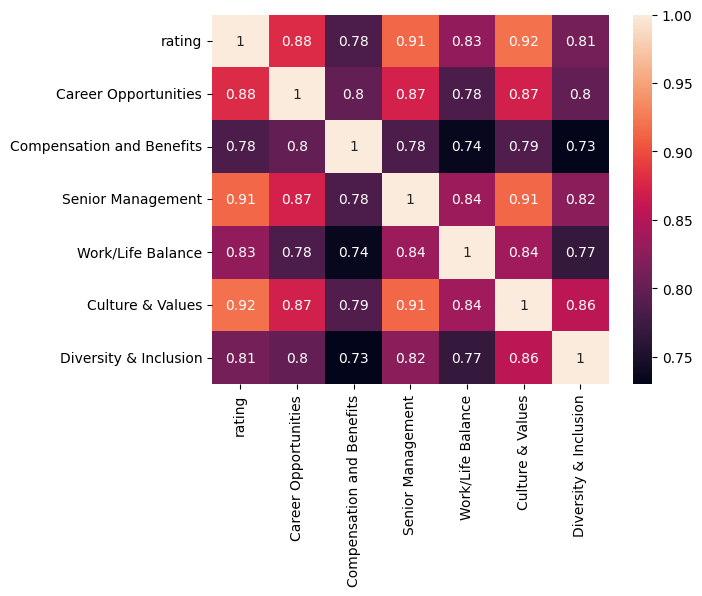

In [ ]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot= True)
plt.show()

In [ ]:
# The numerical variables are highly correlated

### Univariate Analysis

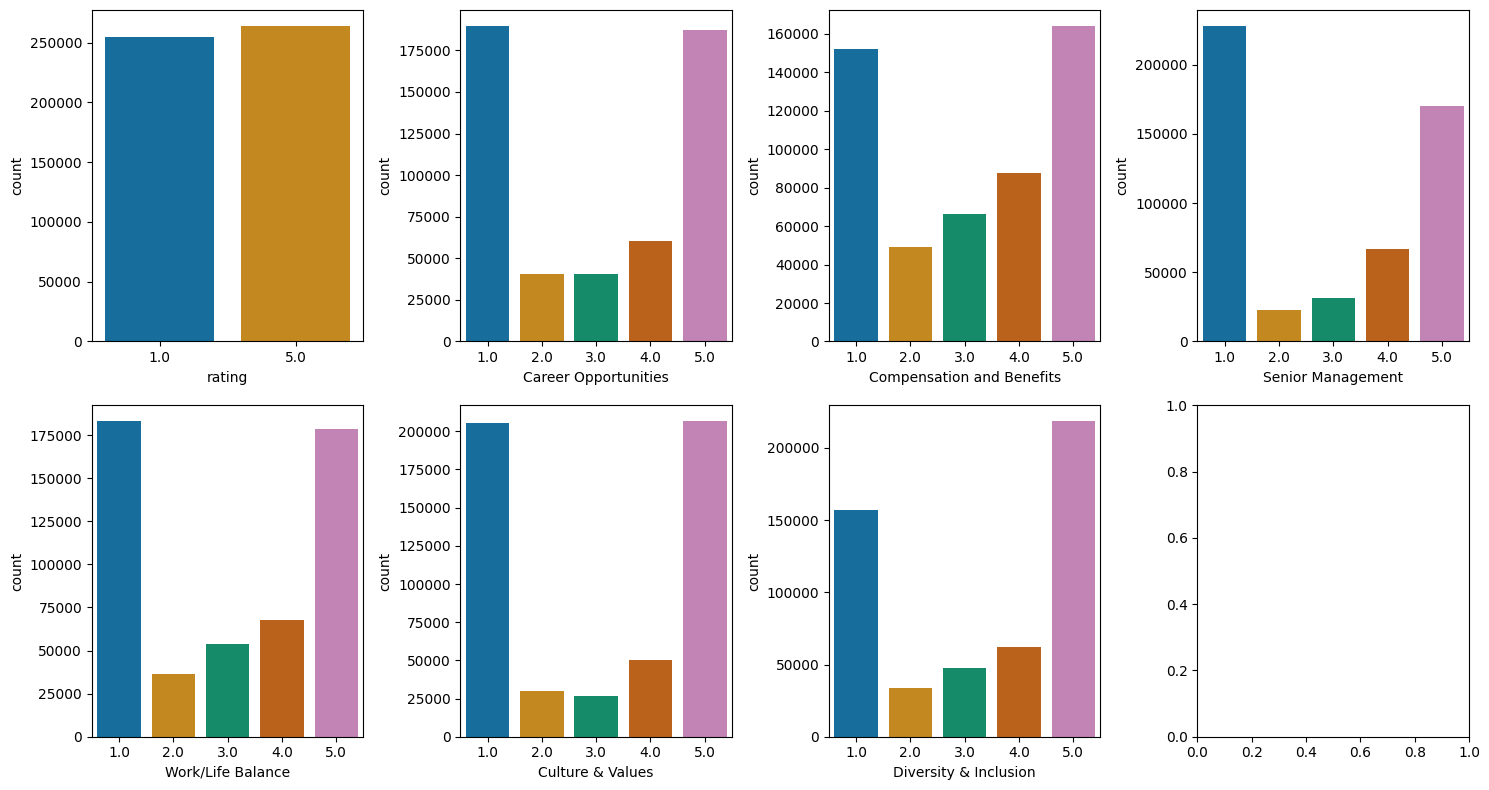

In [ ]:
cols = ['rating', 'Career Opportunities','Compensation and Benefits', 'Senior Management',
        'Work/Life Balance', 'Culture & Values', 'Diversity & Inclusion']
fig, ax = plt.subplots(2,4, figsize=(15,8))
for i, subplot in zip(cols, ax.flatten()):
    vc = df[i].value_counts()
    sns.barplot(x = vc.index, y = vc, palette = 'colorblind', ax=subplot)
plt.tight_layout()
plt.show()

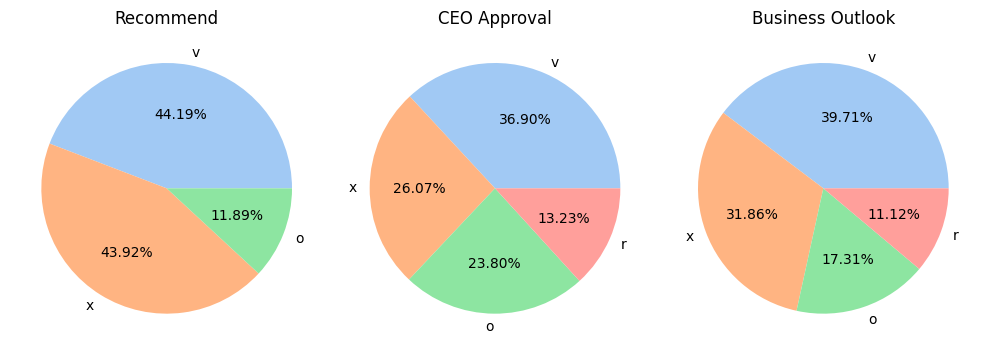

In [ ]:
cols = ['Recommend','CEO Approval', 'Business Outlook']
fig, ax = plt.subplots(1,3, figsize=(10,5))
i = 0
for j in cols:
    plt.title(j)
    vc = df[j].value_counts()
    ax[i].pie(x = vc, labels = vc.index, autopct= "%0.2f%%", colors= sns.color_palette('pastel'))
    ax[i].set_title(j)
    i += 1
plt.tight_layout()
plt.show()

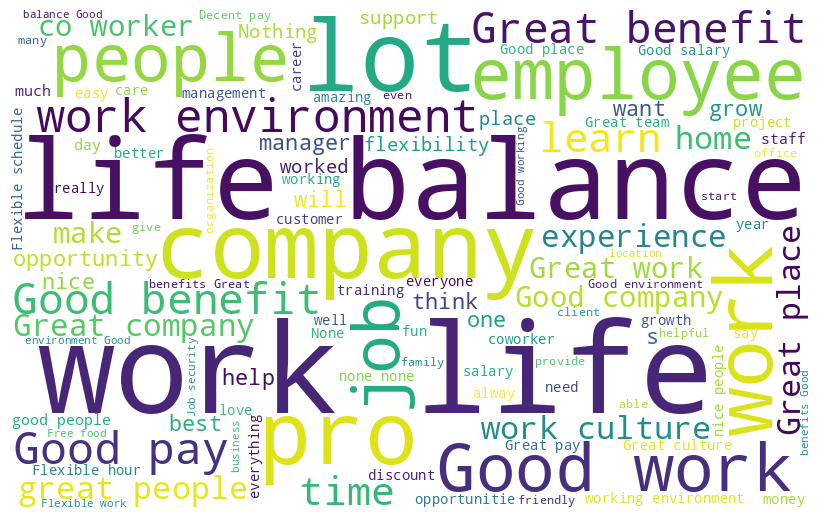

In [ ]:
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(df['pros'].astype(str)))
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

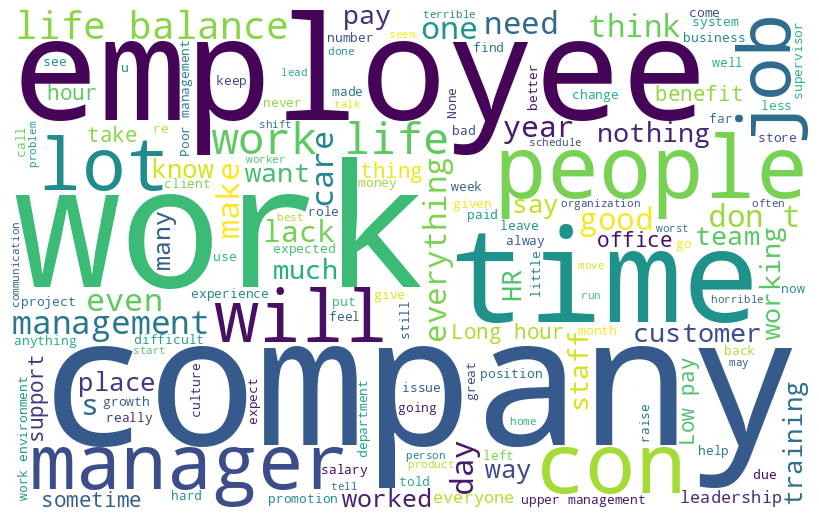

In [ ]:
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(df['cons'].astype(str)))
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
def cattonum(x):
  if x == 'x':
    return 0
  elif x == 'o':
    return 1
  elif x == 'r':
    return 2
  else:
    return 3

In [ ]:
df['Recommend'] = df['Recommend'].apply(cattonum)
df['CEO Approval'] = df['CEO Approval'].apply(cattonum)
df['Business Outlook'] = df['Business Outlook'].apply(cattonum)


In [ ]:
df_meta = df.drop(columns = ['pros', 'cons','title'])

In [ ]:
df_meta.head()

,rating,Recommend,CEO Approval,Business Outlook,Career Opportunities,Compensation and Benefits,Senior Management,Work/Life Balance,Culture & Values,Diversity & Inclusion
0,1.0,0,1,0,1.0,2.0,1.0,2.0,1.0,1.0
1,1.0,0,0,0,3.0,5.0,1.0,1.0,1.0,5.0
2,1.0,0,2,0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,0,0,0,2.0,2.0,2.0,1.0,1.0,4.0
4,1.0,0,0,2,2.0,2.0,1.0,1.0,1.0,1.0


### Classification Model with Meta data

In [ ]:
# We will not use the text and date columns for the classification analysis
# Independent and Target Variable
x = df_meta.drop(columns = 'rating')
y = df_meta['rating']

In [ ]:
y.value_counts()

,count
rating,
5.0,264100
1.0,254704


### Train Test Split

In [ ]:
xtrain ,xtest, ytrain, ytest = train_test_split(x, y, train_size= 0.8, stratify= y, random_state= 7)

#### Fitting Model

In [ ]:
gb = GradientBoostingClassifier(max_depth = 5)
model = gb.fit(xtrain, ytrain)

#### Predictions

In [ ]:
ytestpred = model.predict(xtest)
ytrainpred = model.predict(xtrain)
y_prob = model.predict_proba(xtest)[:, 1]

#### Confusion Matrix

In [ ]:
cm = confusion_matrix(ytest, ytestpred)
cm

array([[50165,   776],
       [  757, 52063]])

<Axes: >

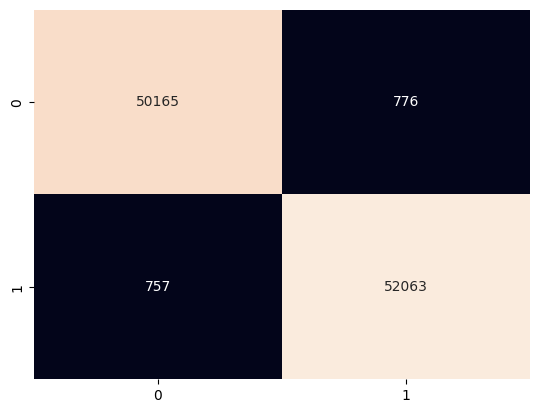

In [ ]:
sns.heatmap(cm, annot=True, cbar= False, fmt='g')

#### Classification Report

In [ ]:
print('Test Data Classification Report\n', classification_report(ytest, ytestpred))
print('Train Data Classification Report\n',classification_report(ytrain, ytrainpred))

Test Data Classification Report
               precision    recall  f1-score   support

         1.0       0.99      0.98      0.98     50941
         5.0       0.99      0.99      0.99     52820

    accuracy                           0.99    103761
   macro avg       0.99      0.99      0.99    103761
weighted avg       0.99      0.99      0.99    103761

Train Data Classification Report
               precision    recall  f1-score   support

         1.0       0.99      0.99      0.99    203763
         5.0       0.99      0.99      0.99    211280

    accuracy                           0.99    415043
   macro avg       0.99      0.99      0.99    415043
weighted avg       0.99      0.99      0.99    415043



In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.7 MB/s eta 0:00:00


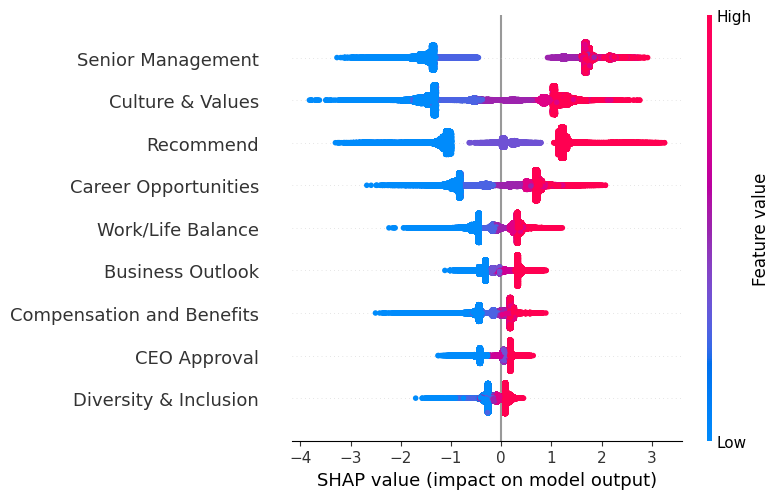

In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(xtest)

# Summary plot of SHAP values
shap.summary_plot(shap_values, xtest)

## Natural Language Processing

In [7]:
df['text'] = df['pros'] + ' ' + df['cons']

In [8]:
df_text = df[['text','rating']]
df_text.head()

,text,rating
0,Part of large corporation provides some financ...,1.0
1,Good benefits \nDecent pay compared to other c...,1.0
2,Coworkers are great and nice Horrible manageme...,1.0
3,$0.50 soda in the breakroom Inconsistent sched...,1.0
4,10% discounts and a great starter job Constant...,1.0


In [9]:
df_text.duplicated().sum()

248

In [10]:
df_text.drop_duplicates(inplace= True)

In [11]:
df_text.reset_index(inplace= True)
df_text.drop(columns = 'index', inplace= True)

In [14]:
import sys
!{sys.executable} -m pip install contractions
import contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.4 MB/s eta 0:00:00


### Text preprocessing

In [15]:
stop_words = set(stopwords.words('english'))
neg_list = ['no','not','can', 'couldn', "couldn't","unable",'don',"don't",'won',"won't", 'wouldn', "wouldn't"]
custom_stop_words = set(stop_words) - set(neg_list)
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = contractions.fix(text)  # Expand contractions
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Lowercase
    text = word_tokenize(text)
    text = [lemmatizer.lemmatize(word) for word in text if word.isalnum() and word not in custom_stop_words]
    return ' '.join(text)

In [16]:
df_text['clean_text'] = df_text['text'].apply(preprocess_text)
df_text.head()

,text,rating,clean_text
0,Part of large corporation provides some financ...,1.0,part large corporation provides financial secu...
1,Good benefits \nDecent pay compared to other c...,1.0,good benefit decent pay compared company rude ...
2,Coworkers are great and nice Horrible manageme...,1.0,coworkers great nice horrible management not f...
3,$0.50 soda in the breakroom Inconsistent sched...,1.0,050 soda breakroom inconsistent schedule no on...
4,10% discounts and a great starter job Constant...,1.0,10 discount great starter job constantly deali...


### TF IDF Method

In [ ]:
# Extracting top 1000 words

In [17]:
tfidf_vectorizer = TfidfVectorizer(max_features= 1000)
tfidf_features = tfidf_vectorizer.fit_transform(df_text['clean_text'])

### Train Test Split

In [18]:
xtraint, xtestt, ytraint, ytestt = train_test_split(tfidf_features, df_text['rating'], test_size=0.2, stratify=df_text['rating'], random_state=7)

### NLP Base Model

#### Fitting Model

In [ ]:
lrt = LogisticRegression()
modelt = lrt.fit(xtraint, ytraint)

#### Predictions

In [ ]:
ypredt = modelt.predict(xtestt)

#### Confusion Matrix

In [ ]:
cmt = confusion_matrix(ytestt, ypredt)
cmt

array([[43177,  7744],
       [ 6151, 46640]])

<Axes: >

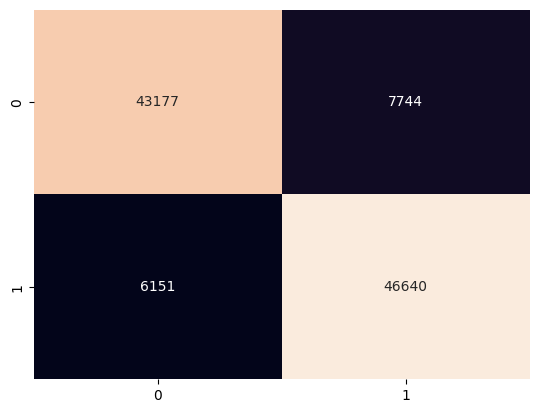

In [ ]:
sns.heatmap(cmt, annot=True, cbar= False, fmt='g')

#### Classification Report

In [ ]:
print(classification_report(ytestt, ypredt))

              precision    recall  f1-score   support

         1.0       0.88      0.85      0.86     50921
         5.0       0.86      0.88      0.87     52791

    accuracy                           0.87    103712
   macro avg       0.87      0.87      0.87    103712
weighted avg       0.87      0.87      0.87    103712



In [19]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
modelt = mnb.fit(xtraint, ytraint)

ypredt = modelt.predict(xtestt)
print(classification_report(ytestt, ypredt))

              precision    recall  f1-score   support

         1.0       0.86      0.84      0.85     50921
         5.0       0.85      0.87      0.86     52791

    accuracy                           0.85    103712
   macro avg       0.85      0.85      0.85    103712
weighted avg       0.85      0.85      0.85    103712



### Word2Vec Method

In [20]:
import contractions

In [21]:
stop_words = set(stopwords.words('english'))
neg_list = ['no','not','can', 'couldn', "couldn't","unable",'don',"don't",'won',"won't", 'wouldn', "wouldn't"]
custom_stop_words = set(stop_words) - set(neg_list)

def preprocess_text(text):
    text = contractions.fix(text)  # Expand contractions
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Lowercase
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word.isalnum() and word not in custom_stop_words]  # Remove stopwords and special characters
    return tokens

df_text['tokens'] = df_text['text'].apply(preprocess_text)

word2vec_model = Word2Vec(sentences=df_text['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Function to get sentence vector by averaging word vectors
def get_sentence_vector(tokens, model):
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

# Create feature vectors
df_text['vector'] = df_text['tokens'].apply(lambda x: get_sentence_vector(x, word2vec_model))

# Prepare data for classification
X = np.vstack(df_text['vector'])
y = df_text['rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict sentiments
y_pred = classifier.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.867324899722308
              precision    recall  f1-score   support

         1.0       0.86      0.87      0.87     50997
         5.0       0.87      0.87      0.87     52715

    accuracy                           0.87    103712
   macro avg       0.87      0.87      0.87    103712
weighted avg       0.87      0.87      0.87    103712



In [22]:
Xdf = pd.DataFrame(X)
Xdf.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.800380,1.241661,-0.879302,-0.678587,0.011594,-0.127282,-0.204390,-0.155000,0.242182,0.085046,...,-0.573259,0.253469,1.515660,-0.027120,0.138939,-0.357680,0.224675,-0.384481,0.296664,-1.758459
1,0.083487,0.185935,-0.192063,0.053709,-1.372572,0.346856,0.098753,-1.346589,0.333545,0.010567,...,-0.645279,-0.350483,0.071708,0.165863,-0.334054,-1.159689,0.671383,-0.521396,0.468059,-0.155423
2,0.167830,0.146312,-0.751507,0.046011,-1.186136,0.048170,0.544827,-1.196262,0.235265,-0.301771,...,-0.229462,-0.560440,0.892164,0.916119,-0.160018,-0.446167,0.789234,-1.528839,0.262070,-1.010788
3,0.233652,0.033174,-0.782502,-0.300392,-0.787443,-0.201696,1.165699,-0.928810,0.469214,0.100294,...,-0.525216,-0.120389,0.089071,0.123317,-0.510239,-0.181935,0.648053,-0.717980,0.412626,-0.281689
4,-0.655863,0.162243,-0.466914,-0.473940,-0.959143,0.142145,0.331355,-0.706898,-0.656414,-0.134449,...,0.555072,-0.373328,-0.177349,-0.121081,-0.453218,0.230581,0.402378,-1.003262,0.968038,-1.153710


Adding Vader Sentiment Compound Score

In [23]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [24]:
analyzer = SentimentIntensityAnalyzer()
def sent_text(text):
  sentiment = analyzer.polarity_scores(text)
  sentiment = sentiment['compound']
  return sentiment
Xdf[100] = df_text['clean_text'].apply(sent_text)

In [25]:
X = Xdf
y = df_text['rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict sentiments
y_pred = classifier.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8720880900956495
              precision    recall  f1-score   support

         1.0       0.87      0.87      0.87     50997
         5.0       0.87      0.88      0.87     52715

    accuracy                           0.87    103712
   macro avg       0.87      0.87      0.87    103712
weighted avg       0.87      0.87      0.87    103712

